In [98]:
import sys

import matplotlib

# matplotlib.use("agg")
import mne

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd

sys.path.append("..")
from config import ica_epoch_path

In [99]:
class EpochReader:
    def __init__(self) -> None:
        self.loaded = {}

    def read(self, path) -> mne.epochs.EpochsFIF:
        if path in self.loaded.keys():
            print("using cached data")
            return self.loaded[path]
        epoch = mne.read_epochs(path, verbose=False)
        self.loaded[path] = epoch
        return epoch

    def clear(self):
        self.loaded = {}

In [100]:
er = EpochReader()


def evoked_per_bin(part_ids, bins, conditions):
    combined_evoked = []
    for bin in bins:
        all_evoked = []
        for part_id in part_ids:
            path = ica_epoch_path(part_id)
            epochs = er.read(path)
            ave = epochs["probe_tone"][conditions][bin].average()
            all_evoked.append(ave)

        avg = mne.combine_evoked(all_evoked, weights="equal")
        combined_evoked.append(avg)
    return combined_evoked

In [101]:
# fmt:off
picks_f = ["Fpz", "Fp1", "Fp2", "AF7", "AF3", "AF4", "AF8"]
picks_r = ["FT8", "T8", "TP8", "FC6", "C6", "CP6"]
picks_l = ["FT7", "T7", "TP7", "FC5", "C5", "CP5"]
picks_b = ["Oz", "POz", "PO8", "PO3", "O1", "O9", "O2", "O10", "PO7"]
# fmt:on

In [102]:
bin1 = ("0", "1", "2")
bin2 = ("3", "4", "5")
bin3 = ("6", "7", "8")
bins_list = bin1, bin2, bin3

part_m_ids = ["m01", "m02", "m03", "m04", "m05", "m06", "m08"]
part_nm_ids = ["nm01", "nm02", "nm03", "nm04"]

In [ ]:
musicians_move = evoked_per_bin(part_m_ids, bins_list, "move")
musicians_no_move = evoked_per_bin(part_m_ids, bins_list, "no_move")
musicians_all = evoked_per_bin(part_m_ids, bins_list, ("move", "no_move"))

no_musicians_move = evoked_per_bin(part_nm_ids, bins_list, "move")
no_musicians_no_move = evoked_per_bin(part_nm_ids, bins_list, "no_move")
no_musicians_all = evoked_per_bin(part_nm_ids, bins_list, ("move", "no_move"))

musicians, move, delay


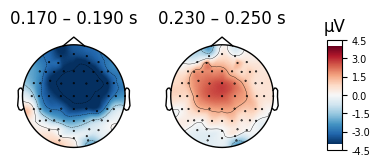

musicians, move, just


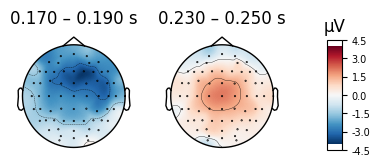

musicians, move, forward


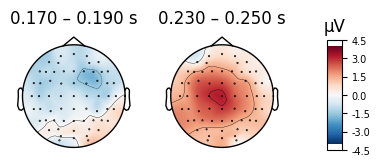

In [104]:
%matplotlib inline
times = [180 * 1e-3, 240 * 1e-3]
average = 21*1e-3
vlim = (-4,4)
print("musicians, move, delay")
_ = musicians_move[0].plot_topomap(times=times, average=average, vlim=vlim)
print("musicians, move, just")
_ = musicians_move[1].plot_topomap(times=times, average=average, vlim=vlim)
print("musicians, move, forward")
_ = musicians_move[2].plot_topomap(times=times, average=average, vlim=vlim)

musicians, no_move, delay


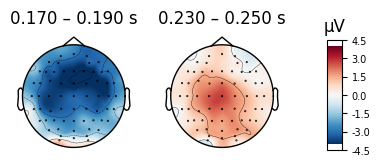

musicians, no_move, just


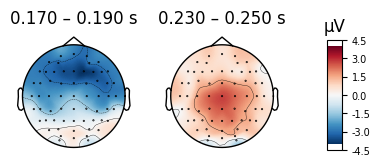

musicians, no_move, forward


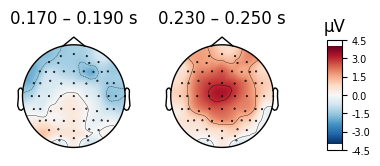

In [105]:
%matplotlib inline
times = [180 * 1e-3, 240 * 1e-3]
average = 21*1e-3
vlim = (-4,4)
print("musicians, no_move, delay")
fig = musicians_no_move[0].plot_topomap(times=times, average=average,vlim=vlim)
print("musicians, no_move, just")
fig = musicians_no_move[1].plot_topomap(times=times, average=average,vlim=vlim)
print("musicians, no_move, forward")
fig = musicians_no_move[2].plot_topomap(times=times, average=average,vlim=vlim)

no_musicians, move, delay


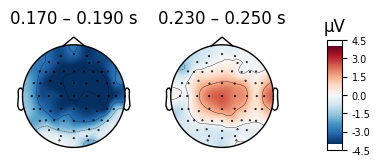

no_musicians, move, just


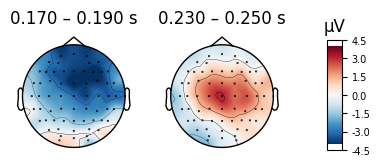

no_musicians, move, forward


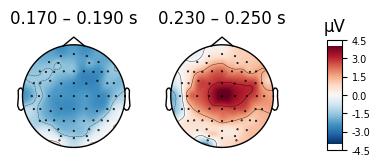

In [106]:
%matplotlib inline
times = [180 * 1e-3, 240 * 1e-3]
average = 21*1e-3
vlim = (-4,4)
print("no_musicians, move, delay")
fig = no_musicians_move[0].plot_topomap(times=times, average=average,vlim=vlim)
print("no_musicians, move, just")
fig = no_musicians_move[1].plot_topomap(times=times, average=average,vlim=vlim)
print("no_musicians, move, forward")
fig = no_musicians_move[2].plot_topomap(times=times, average=average,vlim=vlim)

no_musicians, no_move, delay


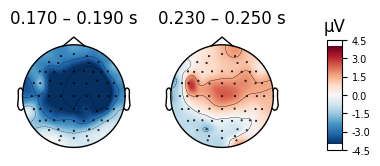

no_musicians, no_move, just


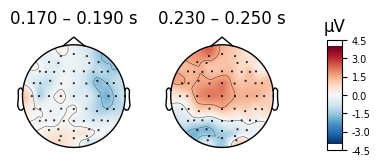

no_musicians, no_move, forward


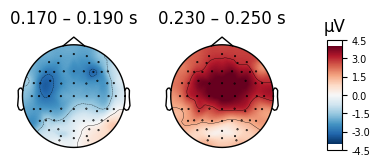

In [107]:
%matplotlib inline
times = [180 * 1e-3, 240 * 1e-3]
average = 21*1e-3
vlim = (-4,4)
print("no_musicians, no_move, delay")
fig = no_musicians_no_move[0].plot_topomap(times=times, average=average,vlim=vlim)
print("no_musicians, no_move, just")
fig = no_musicians_no_move[1].plot_topomap(times=times, average=average,vlim=vlim)
print("no_musicians, no_move, forward")
fig = no_musicians_no_move[2].plot_topomap(times=times, average=average,vlim=vlim)

In [108]:
def plot(evoked, picks):
    alpha = 0.5
    for bin, label in zip(evoked, "<=>"):
        if picks is None:
            bin_data = bin.get_data()
        else:
            bin_data = bin.get_data(picks=picks)
        mean = bin_data.mean(axis=0)
        std = bin_data.std(axis=0, ddof=1) / np.sqrt(len(picks))
        x = np.arange(len(mean))-100
        plt.plot(x, mean, label=f"delay {label} 0")
        plt.fill_between(x, mean - std, mean + std, alpha=alpha)
    plt.xlabel("time[ms]")
    plt.ylabel(r"amp[$\mu$V]")
    plt.ylim([-6 * 1e-6, 6 * 1e-6])
    plt.legend()

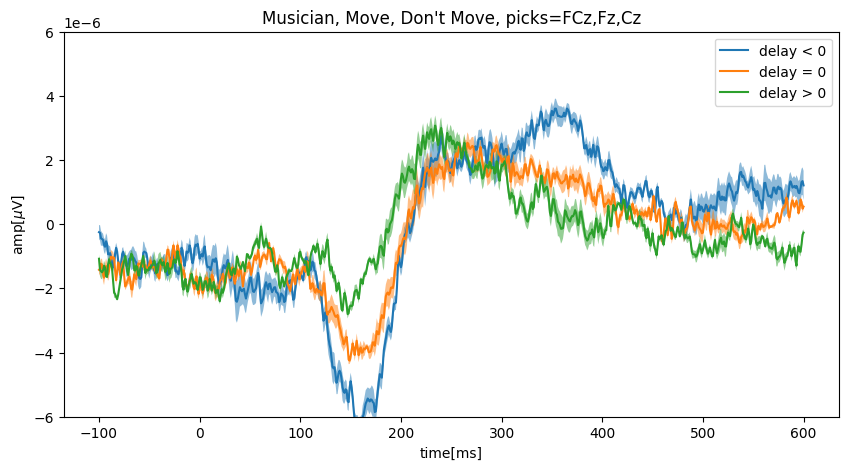

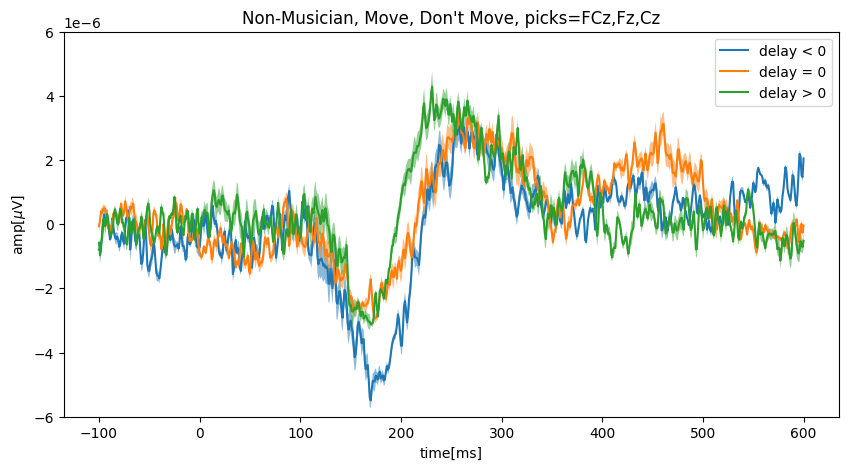

In [109]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(musicians_all, picks)
plt.title(f"Musician, Move, Don't Move, picks={','.join(picks)}")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_musicians_all, picks)
plt.title(f"Non-Musician, Move, Don't Move, picks={','.join(picks)}")
plt.show()

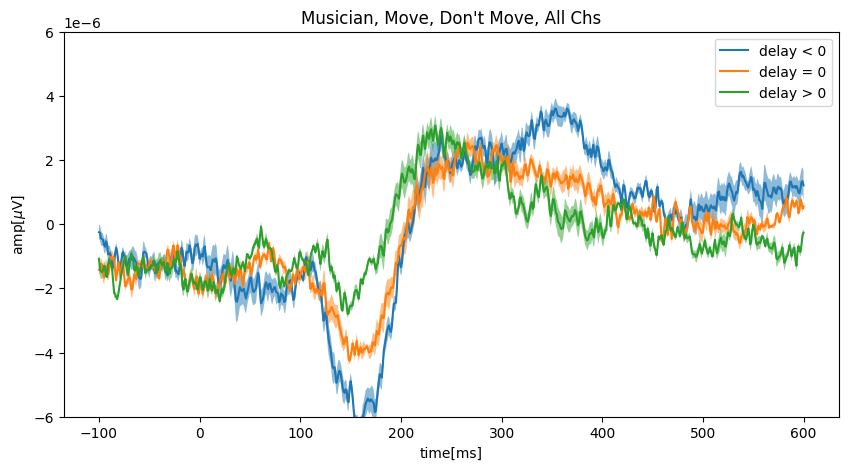

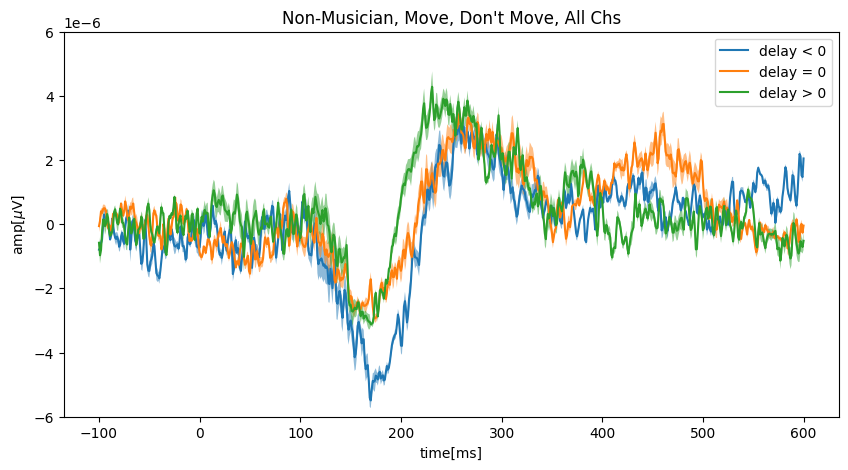

In [110]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(musicians_all, picks)
plt.title(f"Musician, Move, Don't Move, All Chs")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_musicians_all, picks)
plt.title(f"Non-Musician, Move, Don't Move, All Chs")
plt.show()

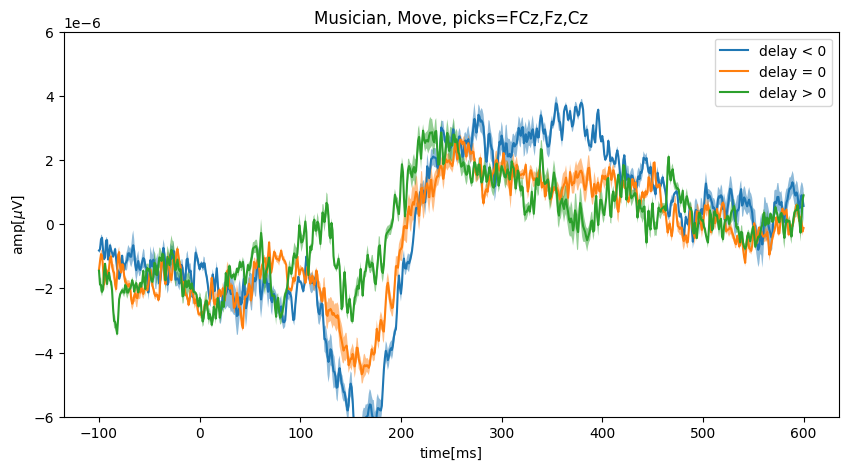

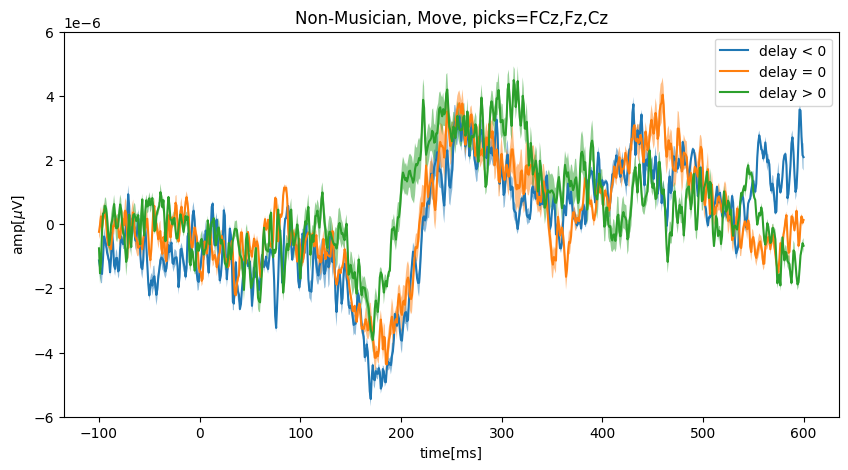

In [111]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(musicians_move, picks)
plt.title(f"Musician, Move, picks={','.join(picks)}")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_musicians_move, picks)
plt.title(f"Non-Musician, Move, picks={','.join(picks)}")
plt.show()

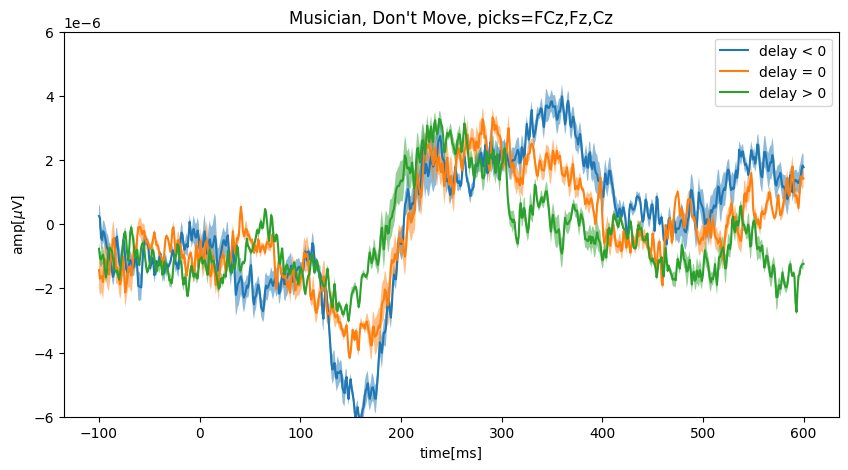

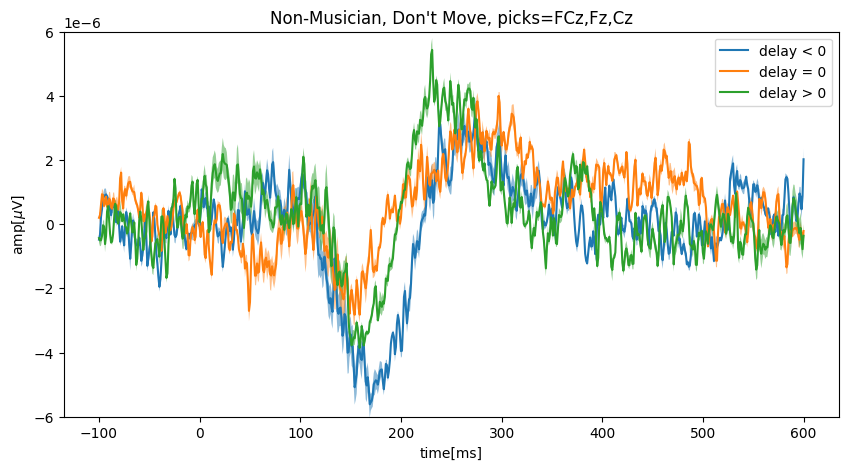

In [112]:
plt.figure(figsize=(10, 5))
picks = ["FCz", "Fz", "Cz"]
plot(musicians_no_move, picks)
plt.title(f"Musician, Don't Move, picks={','.join(picks)}")
plt.show()

plt.figure(figsize=(10, 5))
plot(no_musicians_no_move, picks)
plt.title(f"Non-Musician, Don't Move, picks={','.join(picks)}")
plt.show()